In [1]:
from google.colab import files
from PIL import Image

uploaded = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000.csv


In [68]:
import pandas as pd 
df=pd.read_csv('imdb_top_1000.csv', encoding='utf8')
df['Gross']=df['Gross'].str.replace(',','') #remove column
df = df.dropna(subset=["Gross"]) #dropnNaN because was affecting conversion to int
df['Gross'] = df['Gross'].astype(int) #convert to int
df.sort_values(["Released_Year"], 
                    axis=0,
                    ascending=[True], 
                    inplace=True)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
127,https://m.media-amazon.com/images/M/MV5BZjhhMT...,The Kid,1921,Passed,68 min,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",NaN,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,5450000
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924,Passed,45 min,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,977375
193,https://m.media-amazon.com/images/M/MV5BZjEyOT...,The Gold Rush,1925,Passed,95 min,"Adventure, Comedy, Drama",8.2,A prospector goes to the Klondike in search of...,NaN,Charles Chaplin,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,101053,5450000
462,https://m.media-amazon.com/images/M/MV5BMTEyMT...,Bronenosets Potemkin,1925,NaN,75 min,"Drama, History, Thriller",8.0,In the midst of the Russian Revolution of 1905...,97.0,Sergei M. Eisenstein,Aleksandr Antonov,Vladimir Barskiy,Grigoriy Aleksandrov,Ivan Bobrov,53054,50970
320,https://m.media-amazon.com/images/M/MV5BYmRiMD...,The General,1926,Passed,67 min,"Action, Adventure, Comedy",8.1,When Union spies steal an engineer's beloved l...,NaN,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,1033895


In [64]:
df.shape

(831, 16)

In [65]:
#following https://medium.com/analytics-vidhya/data-analysis-end-to-end-imdb-dataset-2b6d9976ebc2
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 966 to 127
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    831 non-null    object 
 1   Series_Title   831 non-null    object 
 2   Released_Year  831 non-null    object 
 3   Certificate    785 non-null    object 
 4   Runtime        831 non-null    object 
 5   Genre          831 non-null    object 
 6   IMDB_Rating    831 non-null    float64
 7   Overview       831 non-null    object 
 8   Meta_score     750 non-null    float64
 9   Director       831 non-null    object 
 10  Star1          831 non-null    object 
 11  Star2          831 non-null    object 
 12  Star3          831 non-null    object 
 13  Star4          831 non-null    object 
 14  No_of_Votes    831 non-null    int64  
 15  Gross          831 non-null    int64  
dtypes: float64(2), int64(2), object(12)
memory usage: 110.4+ KB


In [66]:
df.describe(include= "all")

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,831,831,831,785,831,831,831.000000,831,750.000000,831,831,831,831,831,8.310000e+02,8.310000e+02
unique,831,831,95,13,133,182,NaN,831,NaN,472,556,704,737,782,NaN,NaN
top,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,2014,U,101 min,Drama,NaN,NASA must devise a strategy to return Apollo 1...,NaN,Steven Spielberg,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,NaN
freq,1,1,31,200,21,75,NaN,1,NaN,13,12,7,5,4,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.946931,NaN,77.460000,NaN,NaN,NaN,NaN,NaN,3.152499e+05,6.803475e+07
std,NaN,NaN,NaN,NaN,NaN,NaN,0.283204,NaN,12.493967,NaN,NaN,NaN,NaN,NaN,3.436443e+05,1.097500e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,1.305000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,7.143000e+04,3.253559e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,78.000000,NaN,NaN,NaN,NaN,NaN,1.867340e+05,2.353089e+07
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,86.000000,NaN,NaN,NaN,NaN,NaN,4.457210e+05,8.075089e+07


In [69]:
def to_million(x):
  return x/1000000
df.Gross = df.Gross.apply(to_million)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
127,https://m.media-amazon.com/images/M/MV5BZjhhMT...,The Kid,1921,Passed,68 min,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",NaN,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,5.450000
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924,Passed,45 min,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,0.977375
193,https://m.media-amazon.com/images/M/MV5BZjEyOT...,The Gold Rush,1925,Passed,95 min,"Adventure, Comedy, Drama",8.2,A prospector goes to the Klondike in search of...,NaN,Charles Chaplin,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,101053,5.450000
462,https://m.media-amazon.com/images/M/MV5BMTEyMT...,Bronenosets Potemkin,1925,NaN,75 min,"Drama, History, Thriller",8.0,In the midst of the Russian Revolution of 1905...,97.0,Sergei M. Eisenstein,Aleksandr Antonov,Vladimir Barskiy,Grigoriy Aleksandrov,Ivan Bobrov,53054,0.050970
320,https://m.media-amazon.com/images/M/MV5BYmRiMD...,The General,1926,Passed,67 min,"Action, Adventure, Comedy",8.1,When Union spies steal an engineer's beloved l...,NaN,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,1.033895


In [40]:
df1=df.groupby("Released_Year").size()
df1.head(500)

Released_Year
1921     1
1924     1
1925     2
1926     1
1927     2
        ..
2016    23
2017    20
2018    14
2019    16
PG       1
Length: 95, dtype: int64

In [70]:
#attempting to group dataset by year and calculate average gross per year following these instructions https://towardsdatascience.com/data-grouping-in-python-d64f1203f8d3

df['AVG_Gross'] = df.groupby('Released_Year').Gross.transform('mean')
df.head(8)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,AVG_Gross
127,https://m.media-amazon.com/images/M/MV5BZjhhMT...,The Kid,1921,Passed,68 min,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",NaN,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,5.450000,5.450000
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924,Passed,45 min,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,0.977375,0.977375
193,https://m.media-amazon.com/images/M/MV5BZjEyOT...,The Gold Rush,1925,Passed,95 min,"Adventure, Comedy, Drama",8.2,A prospector goes to the Klondike in search of...,NaN,Charles Chaplin,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,101053,5.450000,2.750485
462,https://m.media-amazon.com/images/M/MV5BMTEyMT...,Bronenosets Potemkin,1925,NaN,75 min,"Drama, History, Thriller",8.0,In the midst of the Russian Revolution of 1905...,97.0,Sergei M. Eisenstein,Aleksandr Antonov,Vladimir Barskiy,Grigoriy Aleksandrov,Ivan Bobrov,53054,0.050970,2.750485
320,https://m.media-amazon.com/images/M/MV5BYmRiMD...,The General,1926,Passed,67 min,"Action, Adventure, Comedy",8.1,When Union spies steal an engineer's beloved l...,NaN,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,1.033895,1.033895
319,https://m.media-amazon.com/images/M/MV5BNDVkYm...,Sunrise: A Song of Two Humans,1927,Passed,94 min,"Drama, Romance",8.1,An allegorical tale about a man fighting the g...,NaN,F.W. Murnau,George O'Brien,Janet Gaynor,Margaret Livingston,Bodil Rosing,46865,0.539540,0.887853
126,https://m.media-amazon.com/images/M/MV5BMTg5YW...,Metropolis,1927,NaN,153 min,"Drama, Sci-Fi",8.3,In a futuristic city sharply divided between t...,98.0,Fritz Lang,Brigitte Helm,Alfred Abel,Gustav Fröhlich,Rudolf Klein-Rogge,159992,1.236166,0.887853
317,https://m.media-amazon.com/images/M/MV5BNjBjND...,La passion de Jeanne d'Arc,1928,Passed,110 min,"Biography, Drama, History",8.1,"In 1431, Jeanne d'Arc is placed on trial on ch...",NaN,Carl Theodor Dreyer,Maria Falconetti,Eugene Silvain,André Berley,Maurice Schutz,47676,0.021877,0.021877


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

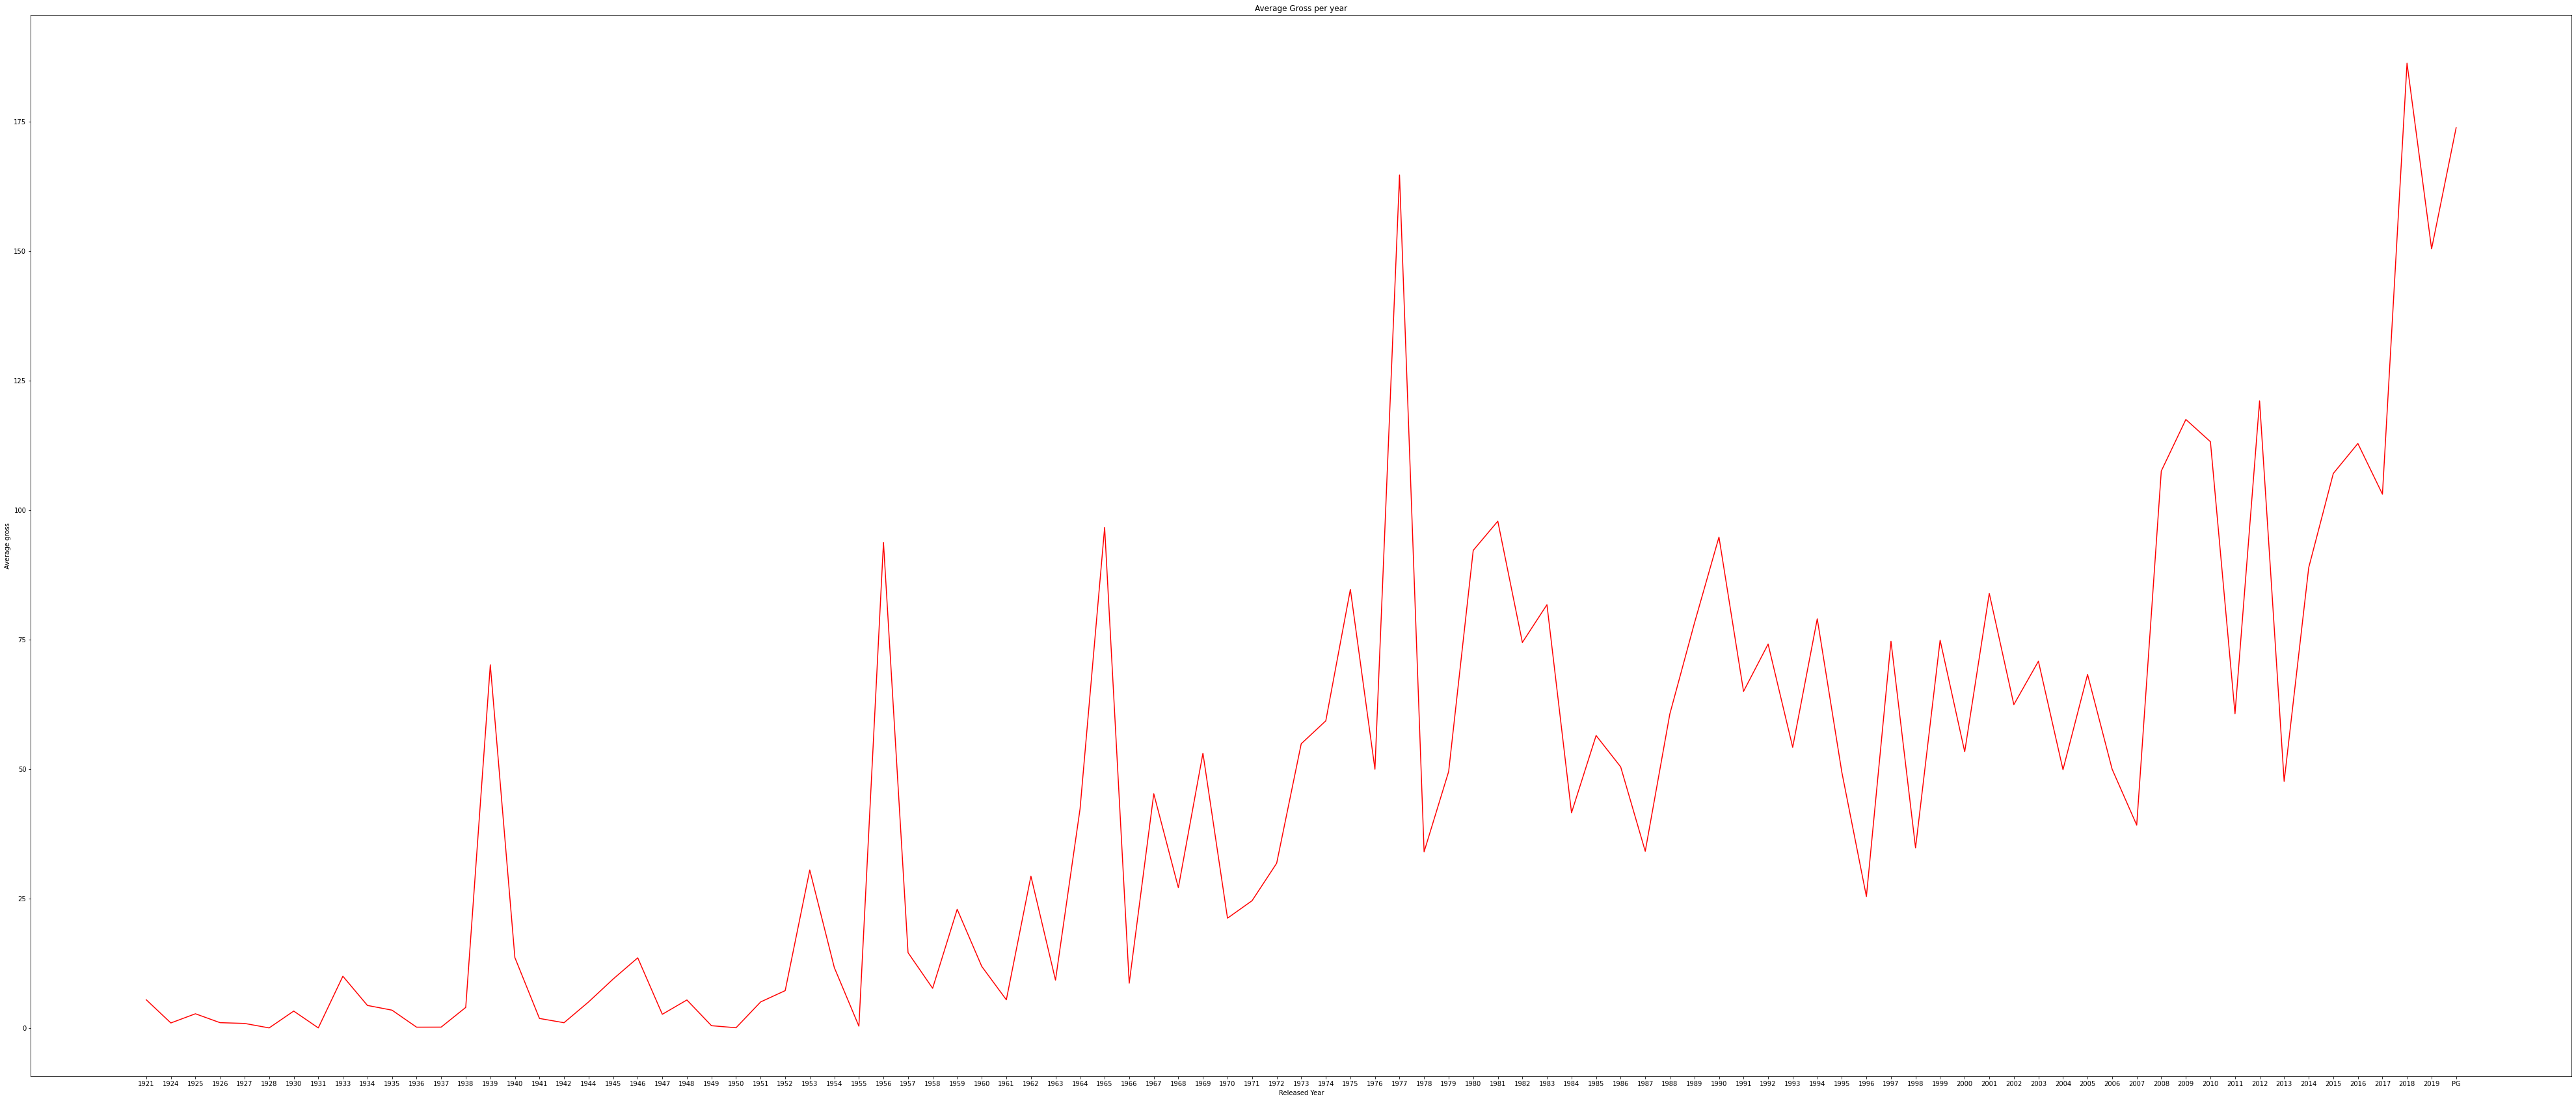

In [79]:
fig, ax = plt.subplots(figsize=(70,30))
ax.plot(df["Released_Year"], df["AVG_Gross"], color="red")
plt.title("Average Gross per year") 
plt.xlabel("Released Year")
plt.ylabel("Average gross") 
plt.show() 



Helpful links:
- https://stackoverflow.com/questions/52349597/calculating-top-10-average-per-year-in-python-groupby-nlargest



